## Visualize Employee Data

* Import the PostgresSQL database into pandas dataframe

* Visualize the most common salary ranges using histogram

* Visualize the average salary by title using bar chart

In [88]:
import psycopg2
from config import pw2
import pandas as pd

### Import the PostgresSQL Database

In [89]:
try:
    # Connect python to postgres
    connec = psycopg2.connect(user = "postgres",
                                  password = pw2,
                                  host = "localhost",
                                  port = "5432",
                                  database = "sql-hw")
    
    # Query "Salaries" table: employee number and salary
    salary_df = pd.read_sql('SELECT * FROM "Salaries"', connec)
    
    # Query "Titles" table: title id and title
    title_df = pd.read_sql('SELECT * FROM "Titles"', connec)

    # Query employee number and title id from the table "Employees"
    employee_df = pd.read_sql('SELECT no, title_id FROM "Employees"', connec)
        
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    if(connec):
        connec.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


### Visualize the most common salary ranges using histogram

In [90]:
salary_df.head()

,employee_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


Text(0, 0.5, 'Frequency')

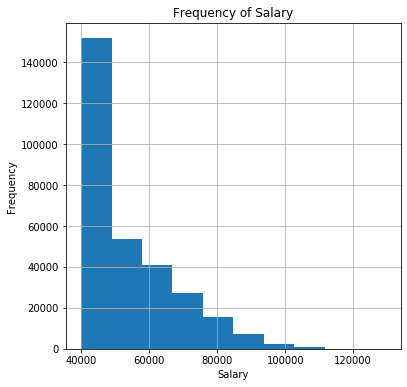

In [91]:
ax = salary_df["salary"].hist(bins=10, figsize=(6,6))
ax.set_title("Frequency of Salary")
ax.set_xlabel("Salary")
ax.set_ylabel("Frequency")

### Visualize the average salary by title using bar chart

In [92]:
employee_df.head()

,no,title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [93]:
title_df.head()

,id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [94]:
# Merge employee dataframe and salary dataframe on employee_no
employee_df.rename(columns={"no":"employee_no"}, inplace=True)
emp_salary_df = pd.merge(employee_df, salary_df, on="employee_no")

# Group by title_id and compute the average of salary
avg_salary_by_title = emp_salary_df.groupby("title_id")["salary"].mean()

# Sort "Titles" table by the title id
title_df.sort_values("id", inplace=True)

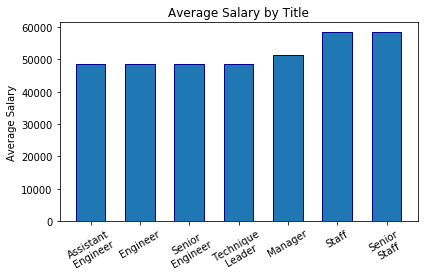

In [95]:
import matplotlib.pyplot as plt

# Set xticks as titles in "Titles" table replacing space by newline
xticks = ["\n".join(title.split(" ")) for title in title_df["title"].values]

# Bar chart
x = [i for i in range(len(xticks))]
y = avg_salary_by_title.values
w = 0.6
plt.title("Average Salary by Title")
plt.bar(x, y, width = w, ec='darkblue')
plt.xticks(x,xticks,rotation=30)
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()